In [1]:
# Data handling
import pandas as pd

#Visualitzation
import seaborn as sns
import matplotlib.pyplot as plt

# Importing  data and cleaning data

You can find all the data in <a href="https://www.kaggle.com/jessemostipak/hotel-booking-demand " target="_blank">this link</a>.

In [2]:
# Getting all the data
data = pd.read_csv(r'./hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


We drop the following columns as per visualitzation proposes we already have all the information needed:

In [3]:
# We have a lot info, we remove some of them
data=data.drop(["agent","company","adr","reservation_status","reservation_status_date"],axis=1)


# Study the data

## What type of data do you have ? Has it a temporal nature? Has it a geographical nature?

The dataset contains data from **two different hotels**. One Resort hotel and one City hotel.

From the publication (https://www.sciencedirect.com/science/article/pii/S2352340918315191) we know that both hotels are located in Portugal (southern Europe) ("H1 at the resort region of Algarve and H2 at the city of Lisbon"). The distance between these two locations is ca. 280 km by car and both locations border on the north atlantic.


 Each row represents a booking and has **temporal information** such as the booking day or arrival date as well as some **geographical nature** for example the nationality of the booking request.
 
 The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017"

## What is the range of values? Which units are used? What precision is required?

We have the following Categorical data

In [4]:
cat_columns=['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type',
                                     'customer_type'
                                        ]

In [5]:
hotel_data_categorical = data[cat_columns]

In [6]:
catdb=pd.DataFrame(hotel_data_categorical.nunique(),columns=["Unique"]).reset_index()
catdb=catdb.rename(columns={'index': 'Variable'})
num=3 # we want to extract the 
catdb["Top Counts"]=None
for index, row in catdb.iterrows():
    tmp=hotel_data_categorical.groupby([row["Variable"]])[[row["Variable"]]].count()
    tmp=tmp.rename(columns={row["Variable"]: 'val'}).sort_values(by='val',ascending=False).reset_index()
    catdb['Top Counts'][index]=set(zip(tmp[row["Variable"]].values[:num],tmp["val"].values[:num]))
catdb["Type"]=["Nominal","Boolean","Temporal","Ordinal","Nominal","Nominal","Nominal","Boolean","Nominal","Nominal","Nominal","Nominal"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In the following table we describre for each categorical variabe:
- **Variable**: Categorical variable
- **Unique**: Number of unique values
- **Top Counts**: Count of most frequent values
- **Type**: Variable Type

In [7]:
catdb

,Variable,Unique,Top Counts,Type
0,hotel,2,"{(Resort Hotel, 40060), (City Hotel, 79330)}",Nominal
1,is_canceled,2,"{(0, 75166), (1, 44224)}",Boolean
2,arrival_date_month,12,"{(August, 13877), (May, 11791), (July, 12661)}",Temporal
3,meal,5,"{(HB, 14463), (SC, 10650), (BB, 92310)}",Ordinal
4,country,177,"{(GBR, 12129), (FRA, 10415), (PRT, 48590)}",Nominal
5,market_segment,8,"{(Offline TA/TO, 24219), (Online TA, 56477), (...",Nominal
6,distribution_channel,5,"{(Direct, 14645), (Corporate, 6677), (TA/TO, 9...",Nominal
7,is_repeated_guest,2,"{(1, 3810), (0, 115580)}",Boolean
8,reserved_room_type,10,"{(E, 6535), (A, 85994), (D, 19201)}",Nominal
9,assigned_room_type,12,"{(D, 25322), (E, 7806), (A, 74053)}",Nominal


We have the following numerical data

In [8]:
hotel_data_numerical= data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type', 
                                       'customer_type'], axis = 1)

In [9]:
numdb=hotel_data_numerical.describe().transpose().drop(["count","25%","50%","75%"],axis=1).reset_index()
numdb["Type"]=["Quantitative","Temporal","Temporal","Temporal","Ordinal","Ordinal","Ordinal",
              "Ordinal","Ordinal","Ordinal","Ordinal","Ordinal","Ordinal","Ordinal","Ordinal"]

All of the Ordinal values are Integers

In [10]:
numdb

,index,mean,std,min,max,Type
0,lead_time,104.011416,106.863097,0.0,737.0,Quantitative
1,arrival_date_year,2016.156554,0.707476,2015.0,2017.0,Temporal
2,arrival_date_week_number,27.165173,13.605138,1.0,53.0,Temporal
3,arrival_date_day_of_month,15.798241,8.780829,1.0,31.0,Temporal
4,stays_in_weekend_nights,0.927599,0.998613,0.0,19.0,Ordinal
5,stays_in_week_nights,2.500302,1.908286,0.0,50.0,Ordinal
6,adults,1.856403,0.579261,0.0,55.0,Ordinal
7,children,0.103890,0.398561,0.0,10.0,Ordinal
8,babies,0.007949,0.097436,0.0,10.0,Ordinal
9,previous_cancellations,0.087118,0.844336,0.0,26.0,Ordinal


## What is it’s life span? (how often shall it be updated)

 The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017". The results should be updated with the current period. Notice that the **current period is affected by covid-19** situation and doing the same analysis could lead to really diferent results (or perhaps we even have data!)

The intend is that this two years data review will help to layout the foundations of a ***real time* dashboard**, therefore this will need visualized on a **weekly basis**  to be able to quickly react on the market. Finally, this dashboard will be needed to be **hosted online**

## How is it distributed?

As said in the previous questions the data is basically splitted in different hotels: **one resort** and **one at the city of Lisbon**.

In [11]:
hotel_distribution= data.drop(['is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type', 
                                       'customer_type'], axis = 1)

In [12]:
hotel_distribution=hotel_distribution.drop(hotel_distribution.columns[7:-2],axis=1)

In [13]:
hotel_distribution=hotel_distribution.drop("required_car_parking_spaces",axis=1)

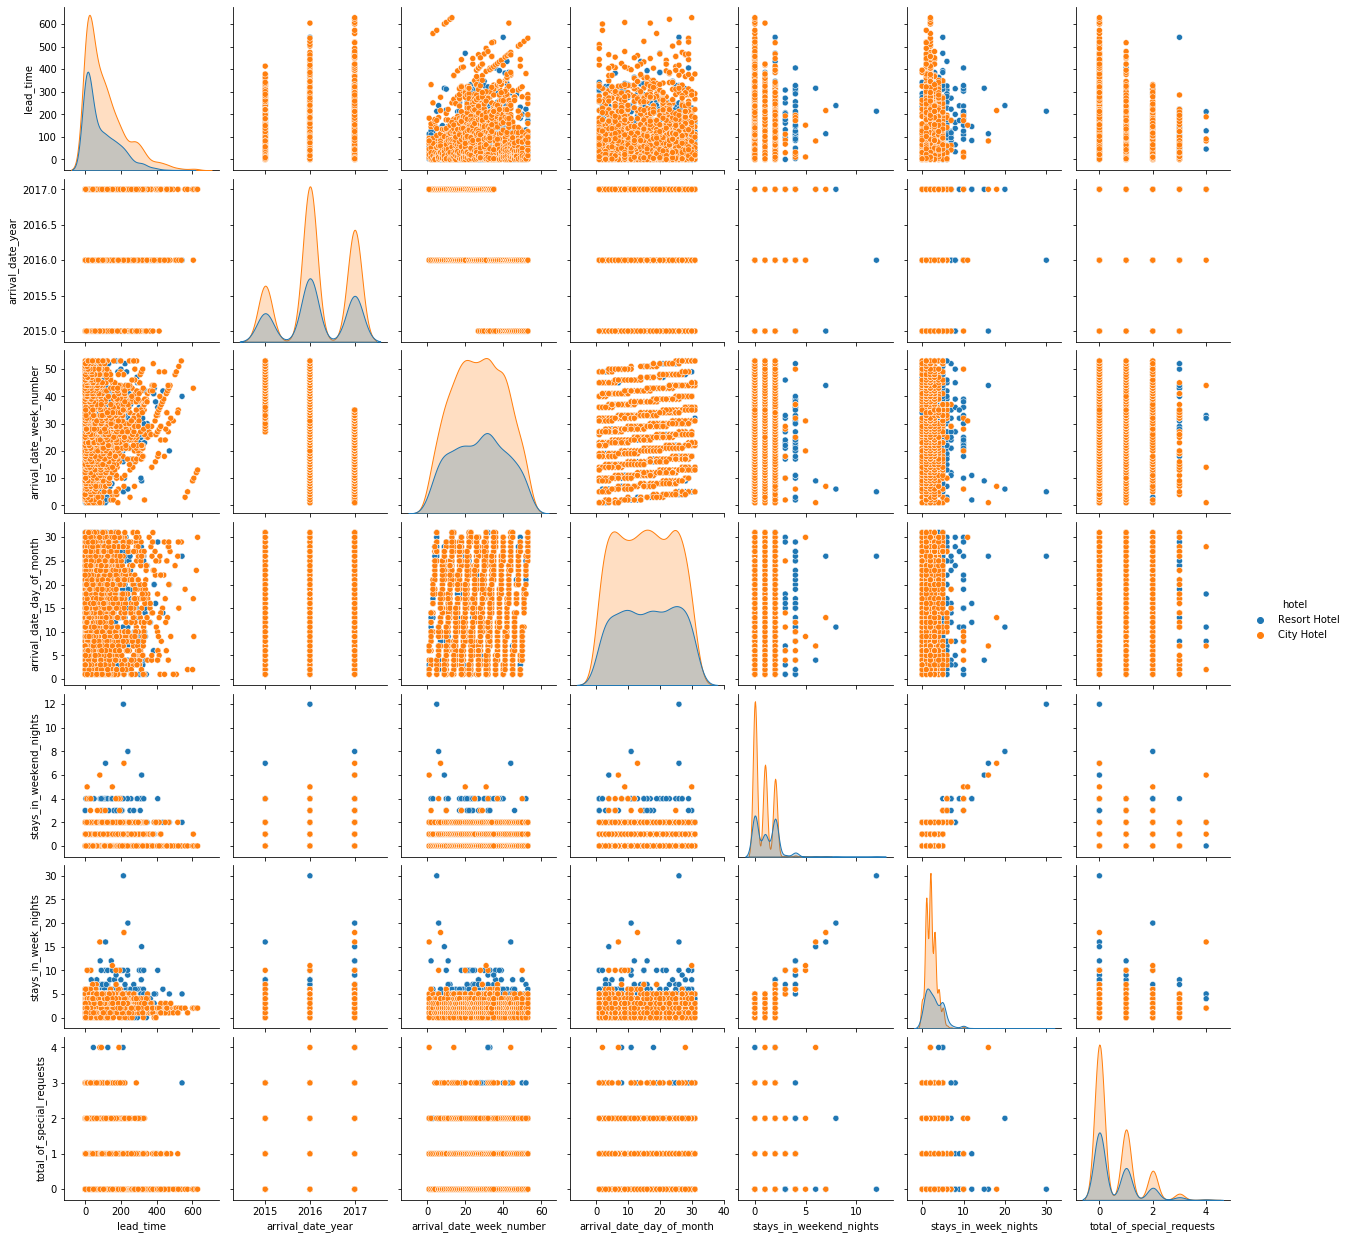

In [14]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(data=hotel_distribution[::50], hue="hotel")

We are able to clearly see diferent interesting things:
- lead_time variable: Represent the time from the booking to the arrival, not follow a normal distribution. Similar to logNorm, also the total_of_special_request follows a similar distribution.
- City hotel: Usually has shorter stays (less variability in the spent week nights)
- Arrival_date year: As the data has half of 2015, the whole 2016 and half of 2017 we cannot compare in the same terms. Perhaps this data will need **to be normalized** or just take the arrival_date-week as a reference.

## Are there outliers? Identify relations and groupings.

We check for the outliers for the numerical data:

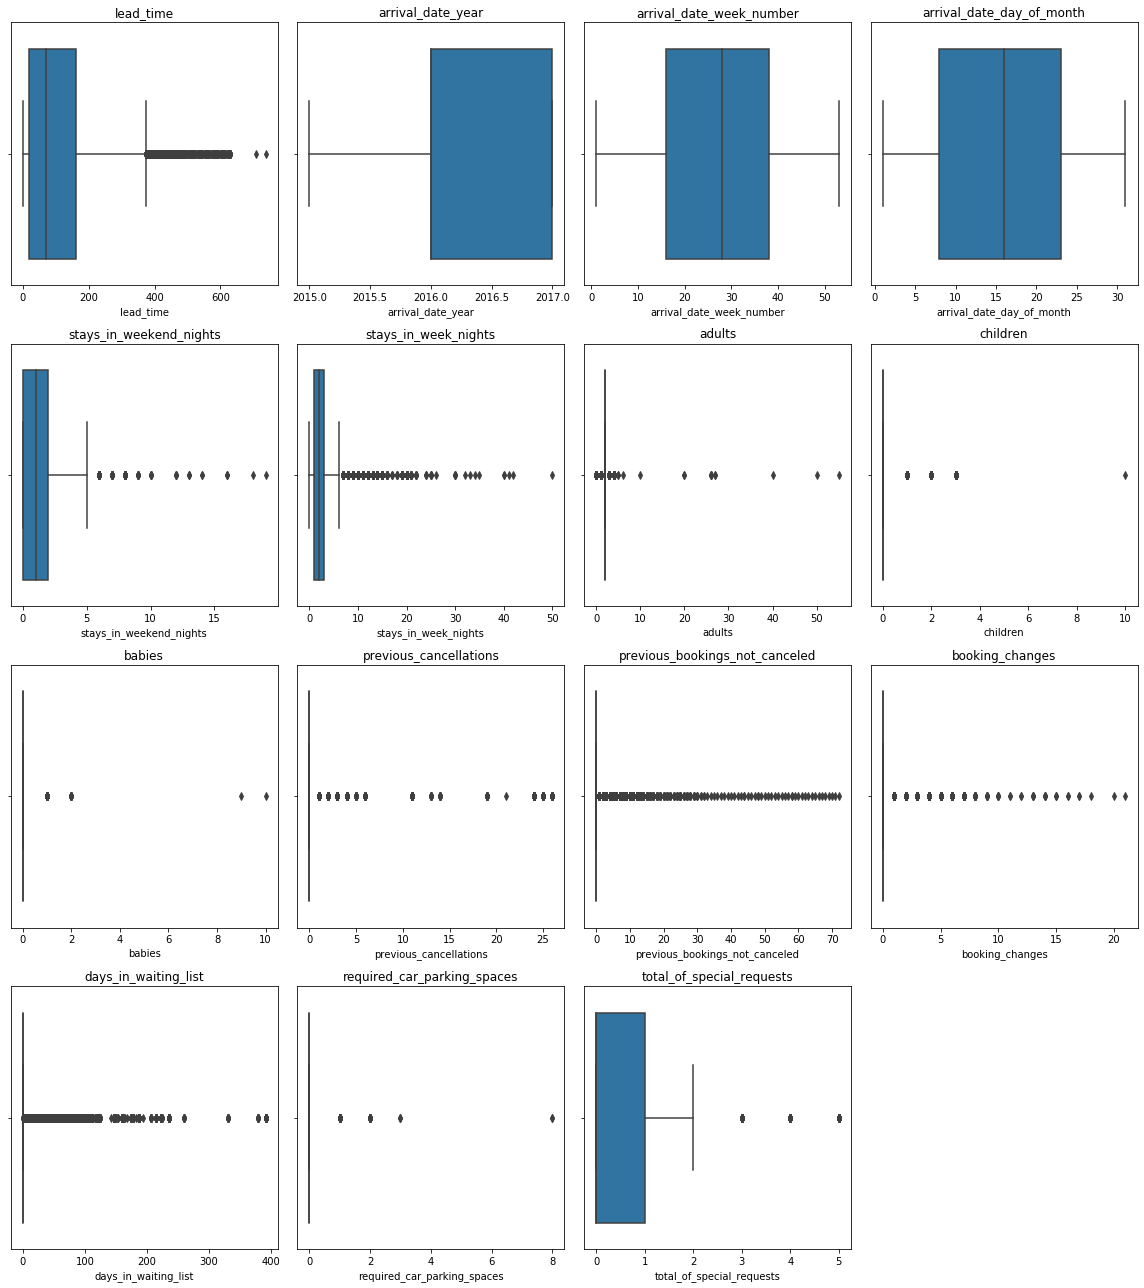

In [15]:
import matplotlib.pyplot as plt
# Creating a boxplot for Outlier detection
features= hotel_data_numerical.columns
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    plt.title(feature)
    sns.boxplot(data[feature])
    n+=1
    plt.tight_layout()

We've detected some outliers:
- LeadTimes higher than 600, this means booking a hotel two years before!. We decide to **exclude** bookings with **leadtimes higher than 500**.
- A booking of more than 50 adults with 10 babies! This is an outlier. We want to focus more on the normal bookings rather the groups. We **remove customer_type='Group'**
- In case of the stay duration, we also remove the most blatant outliers, as well as in the case of booking changes and parking spaces.

In [16]:
data.loc[data.lead_time      > 500,'lead_time'     ]=500
data.loc[data.adults        >   4,'adults'       ]=  4
data.loc[data.previous_bookings_not_canceled      >   0,'previous_bookings_not_canceled'     ]=  1
data.loc[data.previous_cancellations    >   0,'previous_cancellations'   ]=  1
data.loc[data.stays_in_week_nights      >  10,'stays_in_week_nights'     ]= 10
data.loc[data.booking_changes >   5,'booking_changes']=  5
data.loc[data.babies    > 8,'babies']    = 0
data.loc[data.required_car_parking_spaces > 5,'required_car_parking_spaces'] = 0
data.loc[data.children  > 8,'children']  = 0

We have therefore treated our outliers so they won't provide much noise within the visualisation (while this is not as relevant as it would in a data processing and learning mindset, they will still contaminate some basic correlations).

<div class = "alert alert-info" style="border-radius:10px"> <b>REMEMBER:</b> We need to  dedicate a sheet of your visualization to document it, to increase trust</div>

## Create some graphs to explore distribution and relations. Explain what you observe.

As a starting point the pairwise correlations may yield some basic inferences. 

We can see most of the bookings were in the year 2016 and bookings were doine in City hotel
Most bookings were done in the month of May,June, July, August

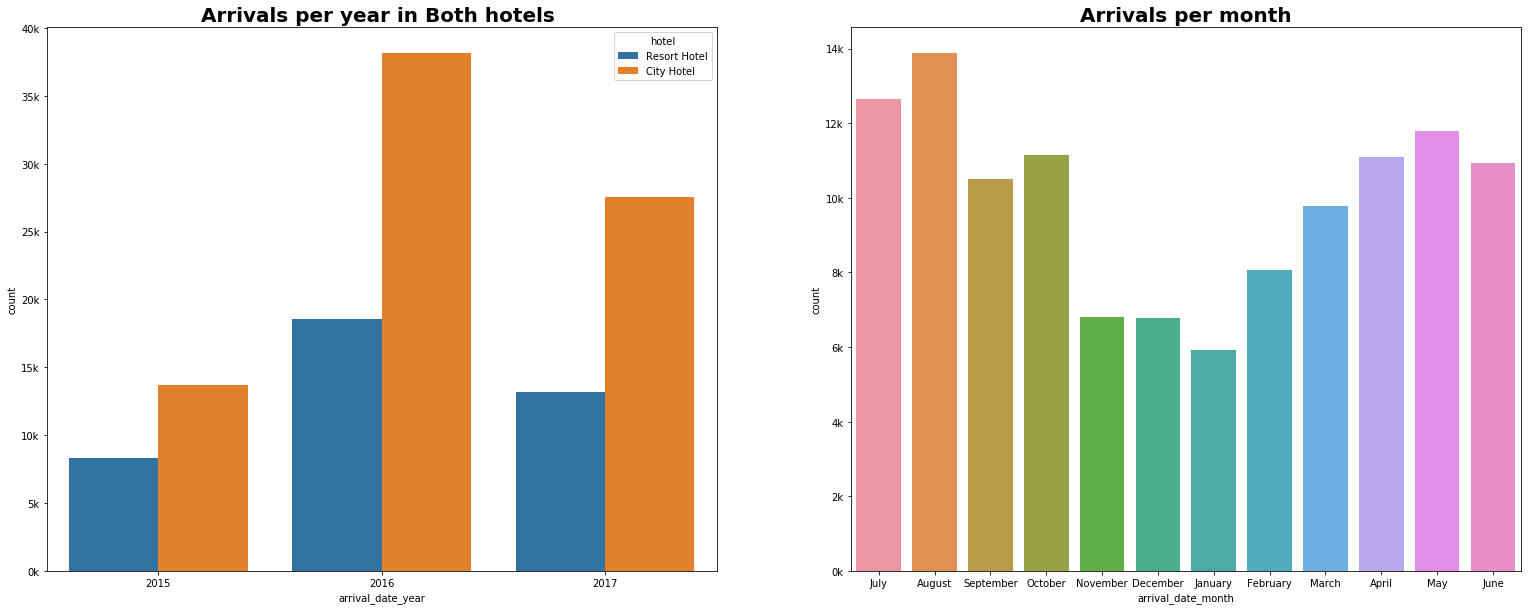

In [17]:
plt.figure(figsize=(13, 10))
plt.subplot(1, 2, 1)
g=sns.countplot(x='arrival_date_year',hue='hotel', data=data)
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
ylabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
plt.subplot(1, 2, 2)
h=sns.countplot(data = data, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=20)
ylabels = ['{:,.0f}'.format(x) + 'k' for x in h.get_yticks()/1000]
h.set_yticklabels(ylabels)
plt.subplots_adjust(right=1.7)

plt.show()

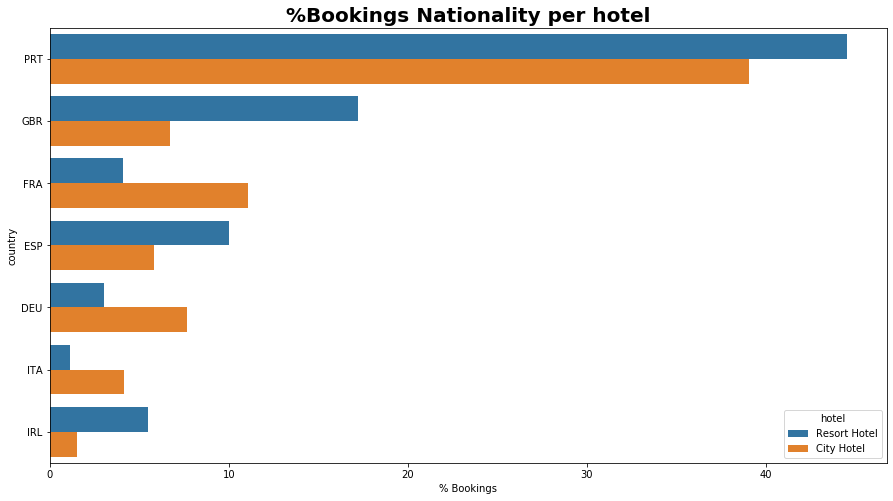

In [19]:
plt.figure(figsize=(15, 8))
country_counts=data.groupby(["hotel"])["country"].value_counts(normalize=True)*100
country_counts=country_counts.rename("% Bookings").reset_index().sort_values(by="% Bookings",ascending=False)
p = sns.barplot(x="% Bookings", y="country", hue="hotel", 
                data=country_counts,order=data.country.value_counts().iloc[:7].index)
plt.title('%Bookings Nationality per hotel',fontweight="bold", size=20)
plt.show()

The most commont visitor are locals Portuguese. Britians, Spanish and Irish are doing arround 30% of the reservations of the booking reservations of the Resort Hotel. This number is much smaller in the City hotel this can be clearly seen in the following graph:

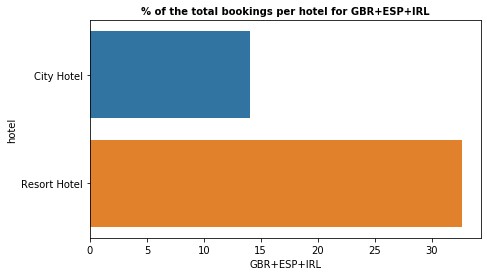

In [20]:
plt.figure(figsize=(7, 4))
subsetcountry=country_counts.loc[country_counts["country"].isin(["GBR","IRL","ESP"])].groupby('hotel')["% Bookings"].sum()
subsetcountry=subsetcountry.reset_index()
p = sns.barplot(y="hotel", x="% Bookings", data=subsetcountry)
p.set_xlabel("GBR+ESP+IRL")
plt.title('% of the total bookings per hotel for GBR+ESP+IRL',fontweight="bold", size=10)
plt.show()

Most bookins are done without **children not babies**, regardless the hotel type, but we observe that Resort hotel is more prompt to have bookings with childeren and babies. Most common booking is **two adults booking**

In [21]:
data.groupby(["hotel"])["adults"].mean()

hotel
City Hotel      1.850977
Resort Hotel    1.858887
Name: adults, dtype: float64

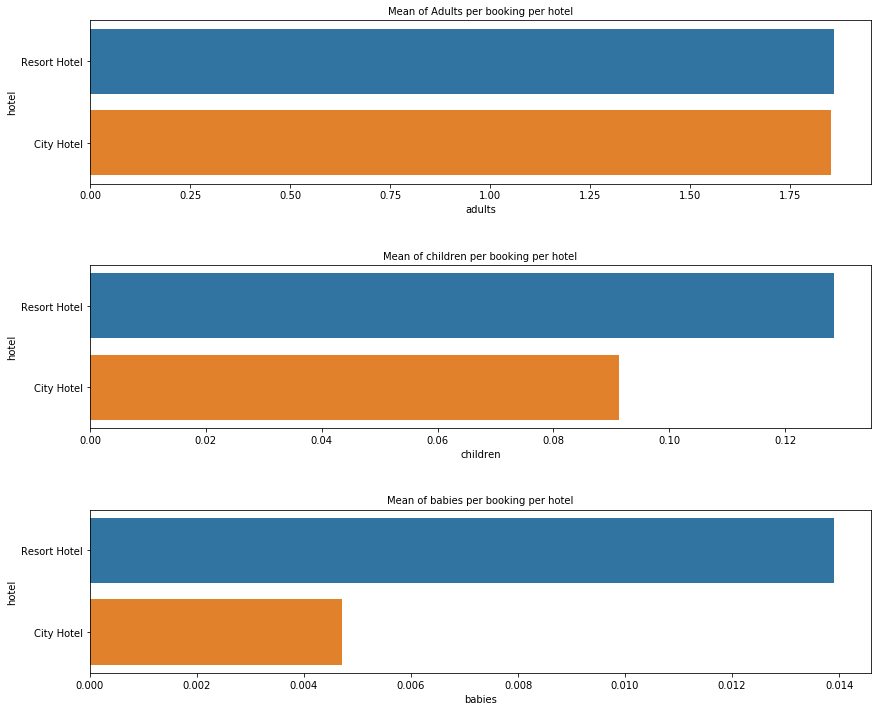

In [23]:
plt.figure(figsize=(14,12 ))

plt.subplot(3, 1, 1)
sns.barplot(x='adults',y='hotel', data=data,ci=False)
plt.title("Mean of Adults per booking per hotel", size=10)

plt.subplot(3, 1, 2)
sns.barplot(x='children',y='hotel', data=data,ci=False)
plt.title("Mean of children per booking per hotel", size=10)

plt.subplot(3, 1, 3)
sns.barplot(x='babies',y='hotel', data=data,ci=False)
plt.title("Mean of babies per booking per hotel", size=10)
plt.subplots_adjust(hspace = 0.5)

plt.show()

Although city hotel have more bookings Resort hotel has more repeated guests.

In [25]:
rep=data.groupby(["hotel"])[["is_repeated_guest"]].sum()/data.groupby(["hotel"])[["is_repeated_guest"]].count()*100
rep=rep.reset_index()

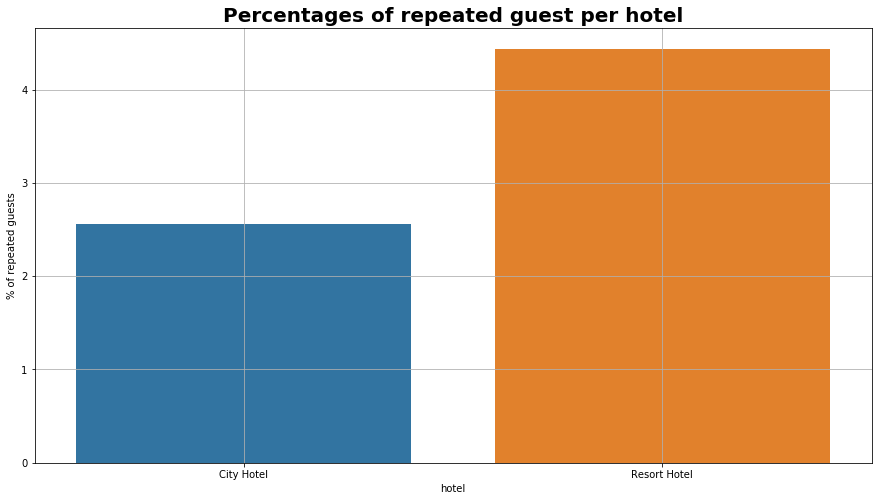

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(y='is_repeated_guest',x='hotel', data=rep)
plt.title('Percentages of repeated guest per hotel',fontweight="bold", size=20)
plt.ylabel("% of repeated guests")
plt.grid()
plt.show()

We can clearly see that when the lead time (Number of days that elapsed between the booking and the arrival date) is **higher than 200 days** (aprox) there is a high chance that this **booking is canceled**:

<Figure size 1500x3600 with 0 Axes>

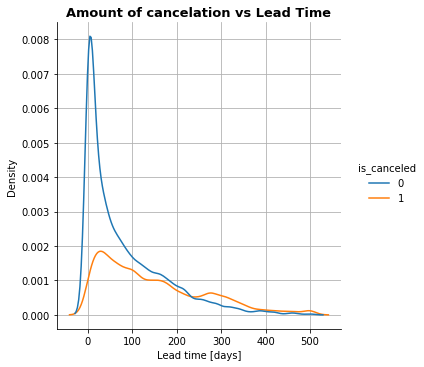

In [27]:
plt.figure(figsize=(5, 12),dpi=300)
sns.displot(data=data, x="lead_time", kind="kde",hue="is_canceled")
plt.title('Amount of cancelation vs Lead Time',fontweight="bold", size=13)
plt.xlabel("Lead time [days]")
plt.grid()
plt.show()